In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('T1.csv')

In [4]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [6]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [16]:
print(df.isnull().sum())
print('-' * 50)
print(f"duplicated rows : {df.duplicated().sum()}")

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64
--------------------------------------------------
duplicated rows : 0


In [17]:
df = df.rename(columns={
    'Date/Time': 'datetime',
    'LV ActivePower (kW)': 'actual_power_kw',
    'Wind Speed (m/s)': 'wind_speed_ms',
    'Theoretical_Power_Curve (KWh)': 'theoretical_power_kw',
    'Wind Direction (°)': 'wind_direction_deg'
})

print(df.head())

           datetime  actual_power_kw  wind_speed_ms  theoretical_power_kw  \
0  01 01 2018 00:00       380.047791       5.311336            416.328908   
1  01 01 2018 00:10       453.769196       5.672167            519.917511   
2  01 01 2018 00:20       306.376587       5.216037            390.900016   
3  01 01 2018 00:30       419.645905       5.659674            516.127569   
4  01 01 2018 00:40       380.650696       5.577941            491.702972   

   wind_direction_deg  
0          259.994904  
1          268.641113  
2          272.564789  
3          271.258087  
4          265.674286  


In [19]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d %m %Y %H:%M')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

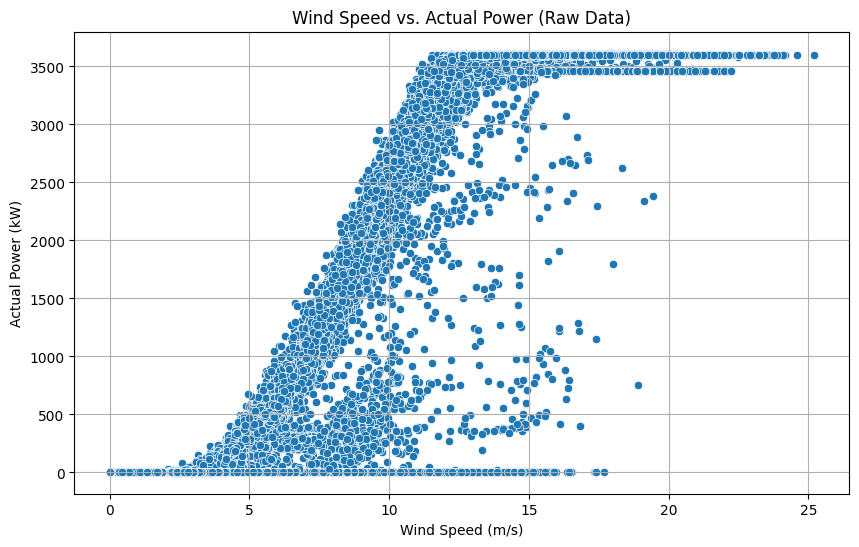

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed_ms', y='actual_power_kw', data=df)
plt.title('Wind Speed vs. Actual Power (Raw Data)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Actual Power (kW)')
plt.grid(True)
plt.show()

In [24]:
df_cleaned = df[df['actual_power_kw'] > 0]

In [25]:
df_cleaned.to_csv('T1_cleaned.csv', index=False)